<a href="https://colab.research.google.com/github/wisdom3D/pandas/blob/main/Part_I_exploration_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part I - (ordgobike)
## by (KOUDAMA Hosé Wisdom)

## Introduction

cet ensemble de données comprend des informations sur les trajets individuels effectués dans un système de partage de vélos couvrant la grande région de la baie de San Francisco.



## Preliminary Wrangling


In [ ]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px
%matplotlib inline

In [ ]:
#mettre les données dans un dataframe pandas
bike = pd.read_csv('/content/ordgobike-tripdata.csv')

In [ ]:
# j'affiche la forme et les types de données de mon ensemble
print(bike.shape)
print(bike.dtypes)
bike.head(4)

(183412, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No


In [ ]:
# je dois convertire les variables start_time,	end_time en type datetime
bike['start_time'] = pd.to_datetime(bike['start_time'])
bike['end_time'] = pd.to_datetime(bike['end_time'])

In [ ]:
#Test de la precedente instruction
print(bike['start_time'].dtypes)
print(bike['end_time'].dtypes)

datetime64[ns]
datetime64[ns]


In [ ]:
# vérification pour le genre nous ne devons pas avoir plus de 3 propositions
bike['member_gender'].unique()

array(['Male', nan, 'Other', 'Female'], dtype=object)

In [ ]:
bike[bike['member_gender'] == bike['member_gender'].isnull()]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip


In [ ]:
# je supprime la seconde ligne car elle contient des valeur NaN pour member_birth_year et	member_gender
bike.drop(1, inplace = True)

In [ ]:
#j'affiche les quatres premières lignes 
bike.head(4)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [ ]:
#je fait une description des colonnes 'duration_sec'et 'member_birth_year'
bike[['duration_sec', 'member_birth_year']].describe()

,duration_sec,member_birth_year
count,183411.000000,175147.000000
mean,725.850560,1984.806437
std,1791.738844,10.116689
min,61.000000,1878.000000
25%,325.000000,1980.000000
50%,514.000000,1987.000000
75%,796.000000,1992.000000
max,85444.000000,2001.000000


In [ ]:
#je crée une nouvelle colonne qui contient les âges des personnes
bike['age'] = 2019 - bike['member_birth_year']
bike.sample(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age
150490,822,2019-02-06 18:01:00.972,2019-02-06 18:14:43.725,130.0,22nd St Caltrain Station,37.757288,-122.392051,42.0,San Francisco City Hall (Polk St at Grove St),37.778650,-122.418230,5463,Subscriber,1960.0,Male,No,59.0
113599,436,2019-02-12 11:39:07.427,2019-02-12 11:46:24.311,71.0,Broderick St at Oak St,37.773063,-122.439078,29.0,O'Farrell St at Divisadero St,37.782405,-122.439446,5467,Subscriber,1972.0,Male,No,47.0
47839,510,2019-02-22 08:26:47.113,2019-02-22 08:35:17.465,204.0,55th St at Telegraph Ave,37.840186,-122.261822,177.0,MacArthur Blvd at Telegraph Ave,37.826286,-122.265100,5197,Subscriber,1994.0,Female,No,25.0


In [ ]:
bike['age'].max()

141.0

je propose de supprimer toute les personnes ayant plus de 100 ans

In [ ]:
#Cette ligne sélectionne toutes les personnes ayant plus de 100 ans.
plus100 = bike[bike['age'] >= 100]

In [ ]:
#Cette ligne supprime toutes les personnes ayant plus de 100 ans.
bike.drop(plus100.index, inplace = True)

In [ ]:
bike['age'].max()

99.0

In [ ]:
#Cette ligne supprime toutes les personnes ayant plus de 90 ans.
plus90 = bike[bike['age'] >= 90]
bike.drop(plus90.index, inplace = True)
bike['age'].max()

89.0


> pour notre enssemble de données nous avons 183334 lignes d'informations sur le partage de velos et 17 colonnes qui nous donne des informations sur les position de départ , d'arrivé et des informations sur le profile de l'utilisateur.

> j'aimerais savoir le moments ou la plus part des voyages sont éffectué et aussi l'age moyen des participants

> je pense que les variables start_time et end_time me seront utilent en ce qui conserne la durée du trajet et aussi member_birth_year pour voire la distribution de l'age des membres

## Univariate Exploration




je commennce avec duration_sec:

**quelle est la distribution de la durée?**

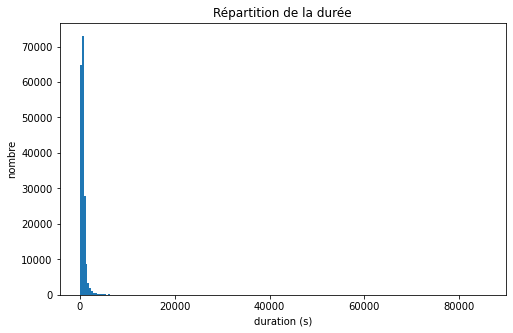

In [ ]:
binsize = 400
bins = np.arange(0, bike['duration_sec'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = bike, x = 'duration_sec', bins = bins)
plt.hist(data = bike, x = 'member_birth_year')
plt.title("Répartition de la durée")
plt.xlabel('duration (s)')
plt.ylabel("nombre")
plt.show()

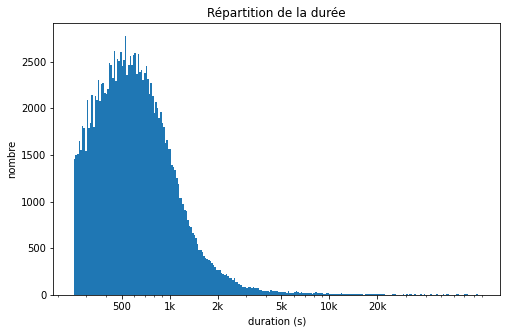

In [ ]:
log_binsize = 0.01
bins = 10 ** np.arange(2.4, np.log10( bike['duration_sec'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = bike, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [500, '1k', '2k', '5k', '10k', '20k'])
plt.title("Répartition de la durée")
plt.xlabel('duration (s)')
plt.ylabel("nombre")
plt.show()

on a une distribution à longue traîn  et la plupart des utilisateurs prennent les vélos pour une durée entre 200 et 1500 seconde il y a aussi quelques personnes une minorité qui louent pour des durées allant de 5000 à 20000.


user_type:

In [ ]:
# crée une fonction qui me trace les diagrammes circulaires et a barre
def baretcercle(X, T):
  plt.figure(figsize=[10, 6])
  plt.subplot(1,2, 1)
  sb.countplot(data = bike , x = X)
  plt.subplot(1,2, 2)
  plt.pie(bike[X].value_counts(), labels = bike[X].value_counts().index, wedgeprops = {'width' : 0.4})
  #Pour définir le titre
  plt.title(T)
  plt.show()

**comment sont repartie les utilisateurs ?**

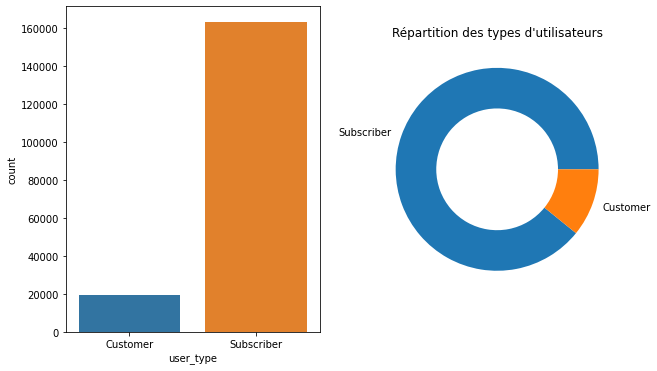

In [ ]:
baretcercle('user_type', 'Répartition des types d\'utilisateurs')

nous pouvons remarquons qu'il y beaucoup plus de Subscriber que de Customer

member_gender:

**quel est le pourcentage de chaque sexe ?**

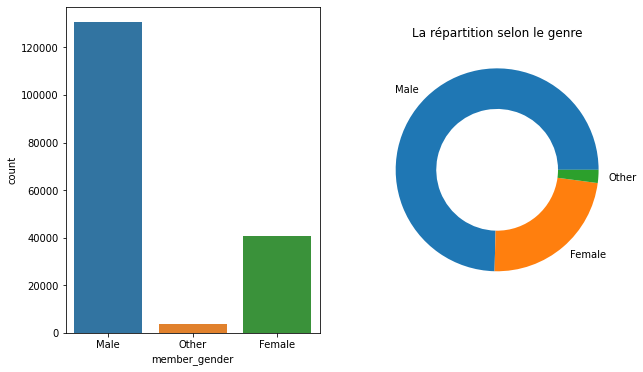

In [ ]:
baretcercle('member_gender', 'La répartition selon le genre')

nous avons plus homme dans l'ensemble de données après on a une portion de femme moins de 1000 et aussi une minorité qui n'on pas spécifié leur sexe

bike_share_for_all_trip:

**quel est le pourcentage de vélo utilisé pour un ou tous les trajets ?**

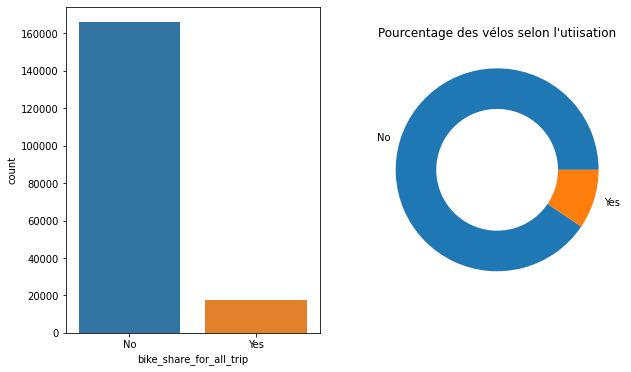

In [ ]:
baretcercle('bike_share_for_all_trip', 'Pourcentage des vélos selon l\'utiisation')

il a un très petit nombre de vélos qui on été utilisé pour tout les voyages (déplacements)

age:

**Comment est répartie l'âge?**

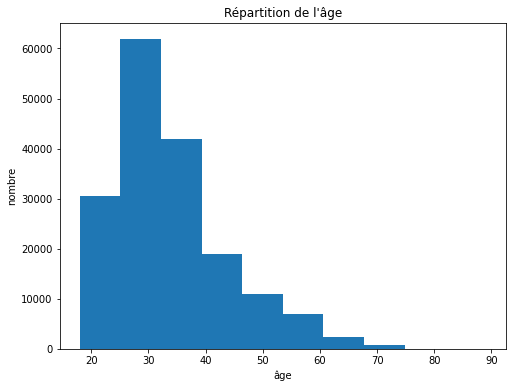

In [ ]:
plt.figure(figsize = (8, 6))
plt.hist(data = bike, x = 'age')
plt.title("Répartition de l'âge")
plt.xlabel("âge")
plt.ylabel("nombre")
plt.show()

On a la plus grande partie des personnes entre 25 et 35 ans. Nous remarquons aussi que plus l'age augmente plus on a  moins de personne qui font du velo

member_birth_year:

**Comment est repartie l'âge?**

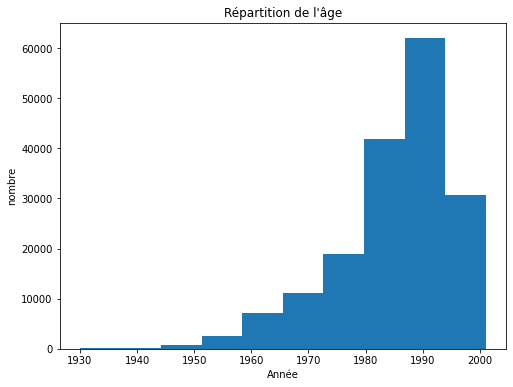

In [ ]:
#member_birth_year
plt.figure(figsize = (8, 6))
plt.hist(data = bike, x = 'member_birth_year')
plt.title("Répartition de l'âge")
plt.xlabel("Année")
plt.ylabel("nombre")
plt.show()

ce graphe dit la même chose que la precedente mais est basé sur les années.

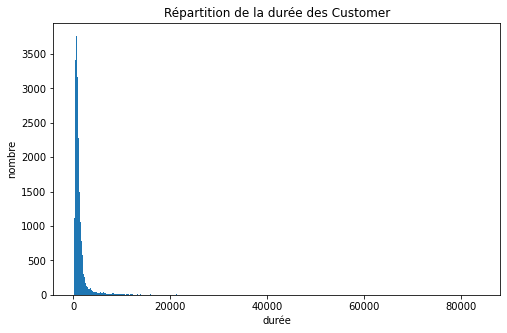

In [ ]:
#je selectionne les Customer
Customer = bike.query("user_type == 'Customer'")
plt.figure(figsize=[8, 5])
plt.hist(data =Customer, x = 'duration_sec', bins = 400)
plt.title("Répartition de la durée des Customer")
plt.xlabel("durée")
plt.ylabel("nombre")
plt.show()

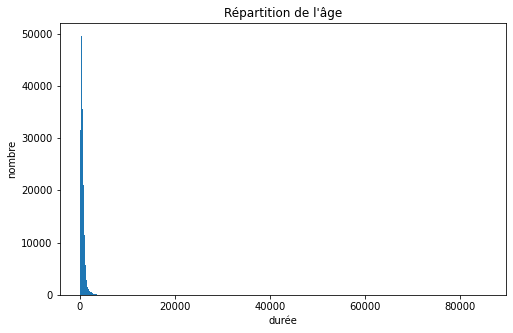

In [ ]:
#je selectionne les Subscriber
Subscriber = bike.query("user_type == 'Subscriber'")
plt.figure(figsize=[8, 5])
plt.hist(data = Subscriber, x = 'duration_sec', bins = 400)
plt.title("Répartition de l'âge")
plt.xlabel("durée")
plt.ylabel("nombre")
plt.show()

Dans les 2 lignes précedentes j'ai essayer de voir ce qui explique le statut de customer ou Subscriber mais je n'est trouver aucune variable.


> j'ai eu a corriger les types pour les dates. 
la variable duration aussi a plusieurs valeurs pour la visualisation j'ai du jouer sur le bins

> j'ai pas eu à faire de gros changements

## Bivariate Exploration



**quelle est la corrélation entre la durée et l'âge?**

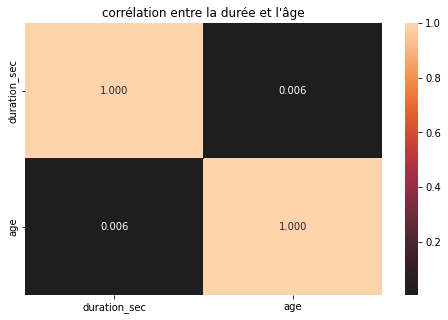

In [ ]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(bike[['duration_sec', 'age']].corr(), annot = True, fmt = '.3f', center = 0)
plt.title("corrélation entre la durée et l'âge")
plt.show()

nous remarquons qu'il n y a pas une forte correlation entre la duré et l'age.

<Figure size 576x576 with 0 Axes>

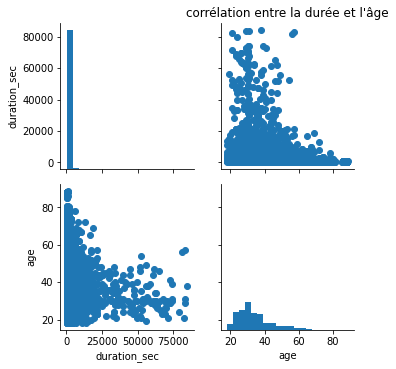

In [ ]:
samples = np.random.choice(bike.shape[0], 500, replace = False)
plt.figure(figsize = [8, 8])
g = sb.PairGrid(data = bike, vars = ['duration_sec', 'age'])
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)
plt.title("corrélation entre la durée et l'âge")
plt.show()

**comment est répartie les type des utilisateurs selon le sexe?**

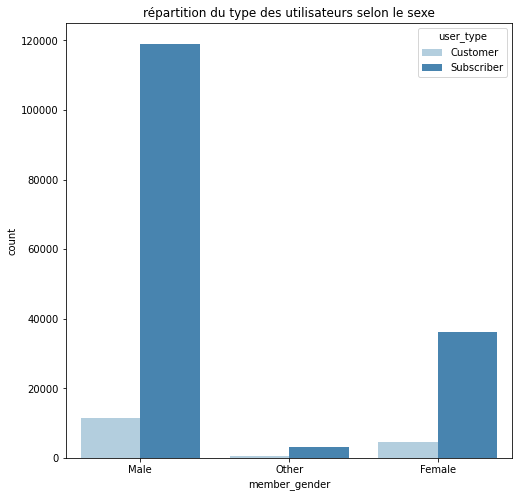

In [ ]:
plt.figure(figsize = [8, 8])
sb.countplot(data = bike, x = 'member_gender', hue = 'user_type', palette = 'Blues')
plt.title("répartition du type des utilisateurs selon le sexe")
plt.show()

On remarque que le pourcentage d'homme Customer est vraiment supérieur au pourcentage des femme; c'est le cas en ce qui conserne les Subscriber aussi. en conclusion le statut Customer ou Suscriber ne dépend pas du sexe.

**quelle est la corrélation entre la durée et l'âge ?**

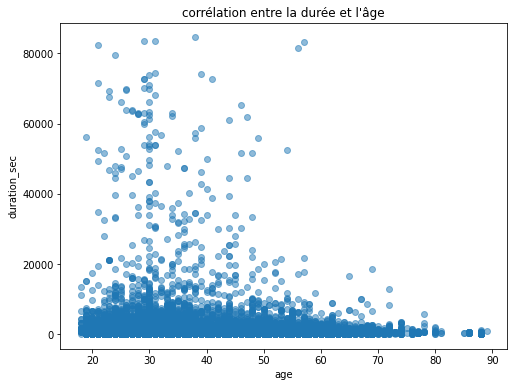

In [ ]:
plt.figure(figsize = [8, 6])
plt.scatter(data = bike, x = 'age', y = 'duration_sec', alpha = 5/10)
plt.xlabel('age')
plt.ylabel('duration_sec')
plt.title('corrélation entre la durée et l\'âge')
plt.show()

On remarque que les plus grande durées sont des gens de moins de 50 ans

In [ ]:
#je crée une fonction qui affiche les boxplot
def monboxplot(A, B, T):
  plt.figure(figsize = [8, 6])
  sb.boxplot(data=bike, y=A, x=B)
  plt.title(T)
  plt.show()

**quelle est la répartition du type d'utilisation selon l'âge?**

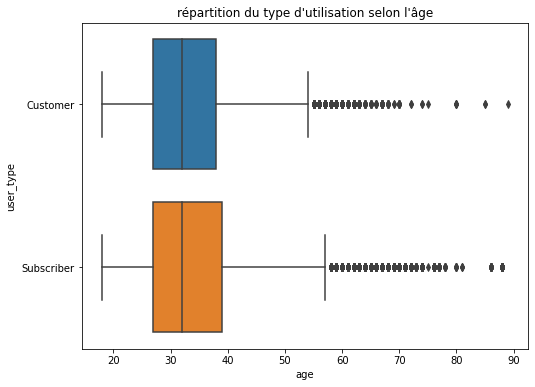

In [ ]:
monboxplot('user_type', 'age', 'répartition du type d\'utilisation selon l\'âge')

Ici on peut ramarquer que l'age ne justifie pas le faite que tu soit Subscriber ou Customer.

**quelle est la répartition du sexe selon l'âge?

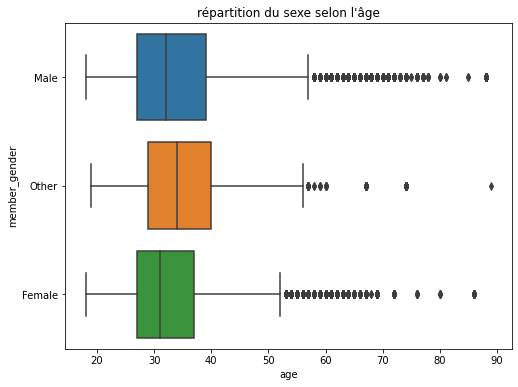

In [ ]:
monboxplot('member_gender', 'age', 'répartition du sexe selon l\'âge')

Ici on remarque qu'il y a plus de femmes jeune.

**quel est l'impact du type d’utilisateur sur la durée de prise des vélos?**

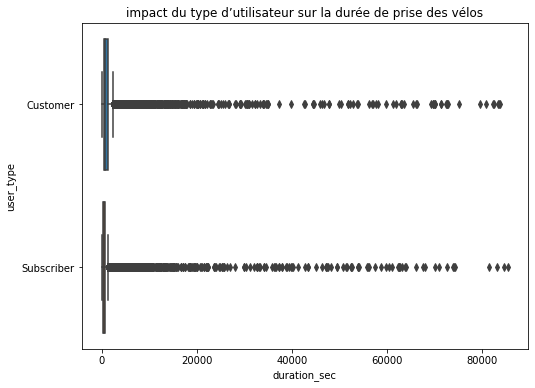

In [ ]:
monboxplot('user_type', 'duration_sec', 'impact du type d’utilisateur sur la durée de prise des vélos')

le statut de Subscriber ou Customer n'agit pas vraiment sur la durée de prise du vélo.

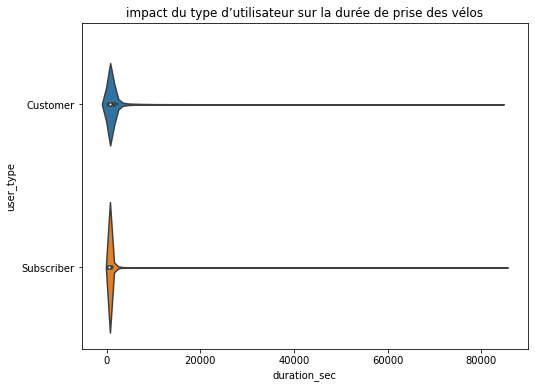

In [ ]:
plt.figure(figsize = [8, 6])
sb.violinplot(data = bike , y = 'user_type', x='duration_sec')
plt.title('impact du type d’utilisateur sur la durée de prise des vélos')
plt.show()

Ce violinplot nous explique bien le graphe precedent.

**quel est l'impact du genre sur la durée de prise des vélos?**

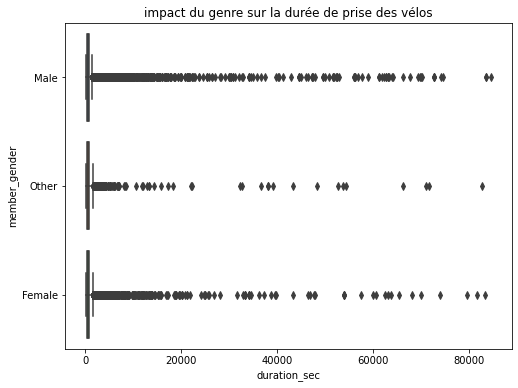

In [ ]:
monboxplot('member_gender', 'duration_sec', 'impact du genre sur la durée de prise des vélos')

Ici le sexe n'agit pas vraiment sur la durée.


>  il n'y a pas une grande relation entre les données mais on peut dire que l'age agit sur la durée

> je ne remarque pas d'autres relations interessante.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

**quel l’impacte du type d’utilisateur sur la relation entre la durée et l'âge?**

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 576x432 with 0 Axes>

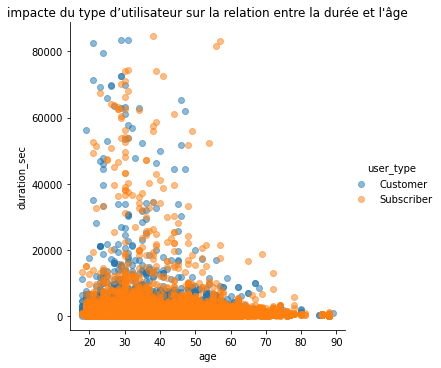

In [ ]:
plt.figure(figsize = [8, 6])
g = sb.FacetGrid(data = bike, hue = 'user_type', size = 5)
g.map(plt.scatter, 'age', 'duration_sec', alpha = 5/10)
g.add_legend()
plt.title('impacte du type d’utilisateur sur la relation entre la durée et l\'âge')
plt.show()

La variation de l'age en fonction de la durée ne dépend pas du **user_type**

**quel l’impacte du genre sur la relation entre la durée et l'âge?**

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 576x432 with 0 Axes>

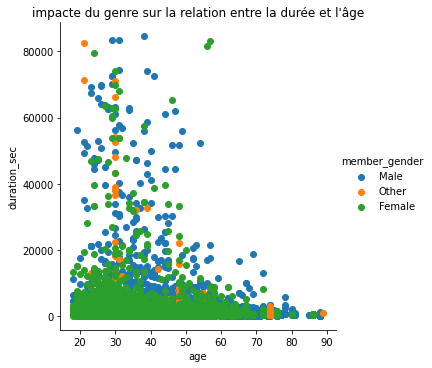

In [ ]:
plt.figure(figsize = [8, 6])
g = sb.FacetGrid(data = bike, hue = 'member_gender', size = 5)
g.map(plt.scatter, 'age', 'duration_sec')
g.add_legend()
plt.title('impacte du genre sur la relation entre la durée et l\'âge')
plt.show()

La variation de l'age en fonction de la durée ne dépend pas du **genre**

In [ ]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 16.0 MB/s 
     |████████████████████████████████| 16.7 MB 65.1 MB/s 
     |████████████████████████████████| 6.3 MB 43.2 MB/s 


In [ ]:
import geopandas as gpd

**Comment est la répartition des points de départ?**

In [ ]:
#une fonction qui affiche la position des points
def repartition(X, Y, Z):
  start = gpd.GeoDataFrame(bike, geometry = gpd.points_from_xy(bike[X], bike[Y]))
  start.plot(markersize = 1.5, figsize = (10, 10), legend = True)
  plt.title(Z)
  plt.xlabel(X)
  plt.ylabel(Y)

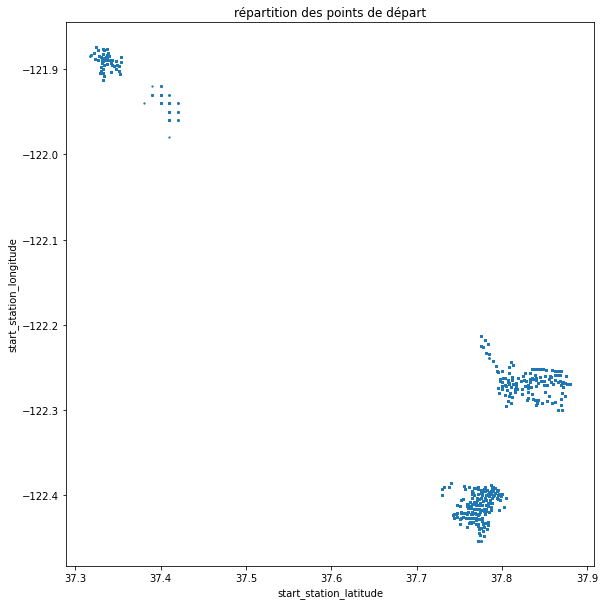

In [ ]:
repartition('start_station_latitude', 'start_station_longitude', 'répartition des points de départ')

une visualisation de ma répartition des points de départ

**Comment est la répartition des points d'arriver?**

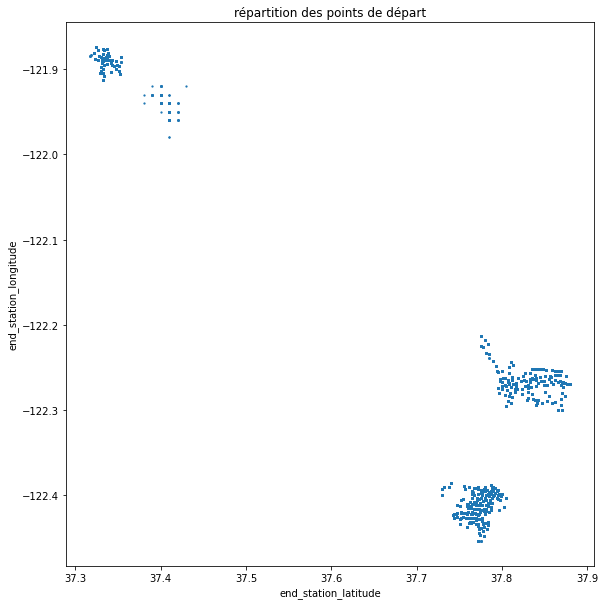

In [ ]:
repartition('end_station_latitude', 'end_station_longitude', 'répartition des points de départ')

une visualisation de ma répartition des points d'arrivée

In [ ]:
bike.to_csv("bikedata.csv")


> Dans l'ensemble de données tout les variables sont dépendante du moin il y a une très faible relation.

## Conclusions
j'ai eu a explorer les données sous differentes formes ceci était bien mais j'ai pas eu de résultat pertinent dans mon ensemble de donées
